In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,auc,f1_score,precision_recall_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import normalize
import tensorflow as tf
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset_test = pd.read_csv("test.csv")
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataset_test['Age'] = dataset_test['Age'].fillna(dataset_test['Age'].mean())
dataset_test['Fare'] = dataset_test['Fare'].fillna(dataset_test['Fare'].mean())

In [5]:
dataset_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
gender = pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
dataset.shape

(891, 12)

In [8]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Embarked'] = dataset['Embarked'].fillna('C')

In [10]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
dataset.Survived.value_counts(normalize = True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [13]:
dataset.Pclass.value_counts(normalize = True)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [14]:
dataset.Parch.value_counts(normalize = True)*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

In [15]:
dataset.Sex.value_counts(normalize = True)*100
data_age= dataset['Age'].dropna() #Hust for visulaization purpose

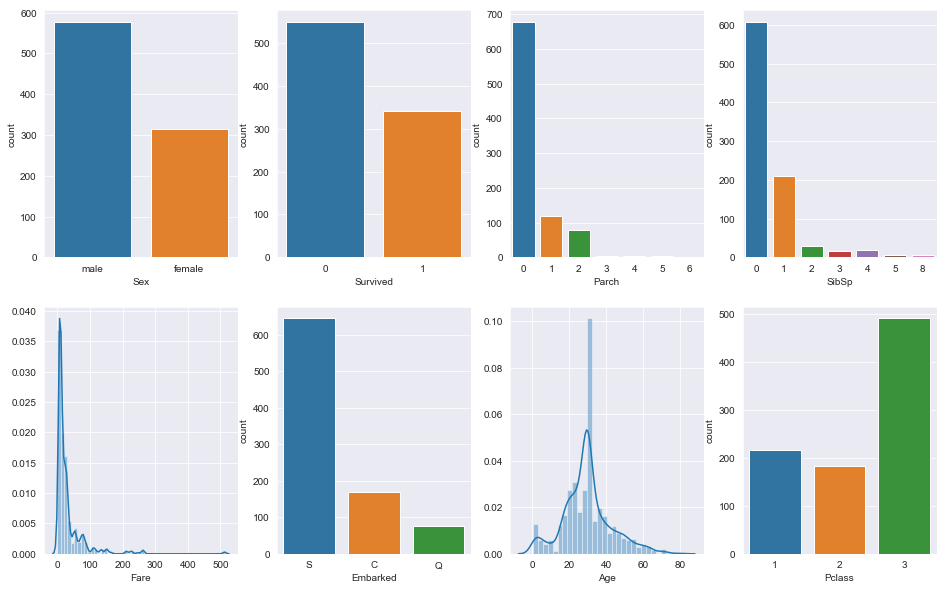

In [16]:
fig, axes = plt.subplots(2,4,figsize = (16,10), sharex = False, sharey = False)

sns.countplot(x = 'Sex', data = dataset, ax = axes[0,0])
sns.countplot(x = 'Survived', data = dataset, ax = axes[0,1])
sns.countplot(x = 'Parch', data = dataset, ax = axes[0,2])
sns.countplot(x = 'SibSp', data = dataset, ax = axes[0,3])
sns.distplot(dataset['Fare'],ax = axes[1,0])
sns.countplot(x = 'Embarked', data = dataset, ax = axes[1,1])
sns.distplot(data_age, ax = axes[1,2])  #dropped all the NaN values and plotted the remaining float value
sns.countplot(x = 'Pclass', data = dataset,ax = axes[1,3])

In [17]:
dataset_corr = dataset.corr()

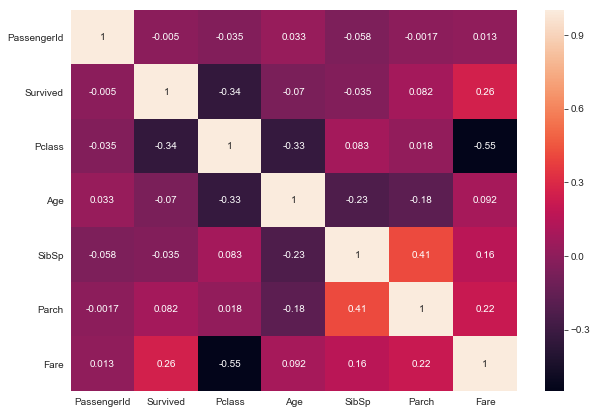

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(dataset_corr,annot = True)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


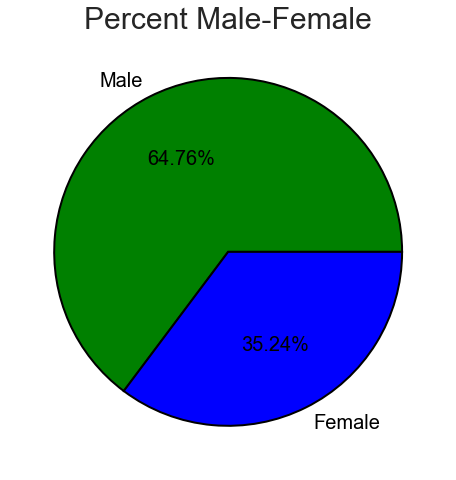

In [19]:
#PIE chart visualization for Male-Female Percentage
plt.figure(figsize = (8,8))
plt.title('Percent Male-Female',fontsize = 30)
x_sex,y_sex = dataset.Sex.value_counts(normalize = True)*100
print(dataset.Sex.value_counts(normalize = True)*100)
wedges= plt.pie([x_sex,y_sex], labels = ['Male','Female'], colors = ['green','blue'], autopct='%.2f%%', 
        textprops = {'color':'Black','size':20}, wedgeprops={'linewidth':2, 'edgecolor':'black'})
plt.show()

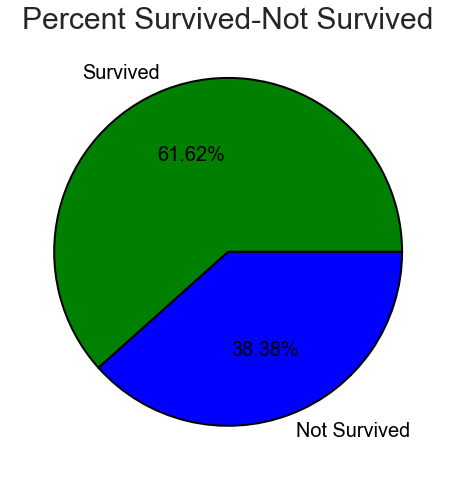

In [20]:
#PIE chart visualization for Survived-Not Survived Percentage
plt.figure(figsize = (8,8))
plt.title('Percent Survived-Not Survived', fontsize = 30)
x_surv, y_surv = dataset.Survived.value_counts(normalize = True)*100
plt.pie([x_surv,y_surv], labels = ['Survived','Not Survived'], colors = ['green','blue'],  autopct='%.2f%%', 
        textprops = {'color':'Black','size':20}, wedgeprops={'linewidth':2, 'edgecolor':'black'})
plt.show()

Text(0, 0.5, 'Count')

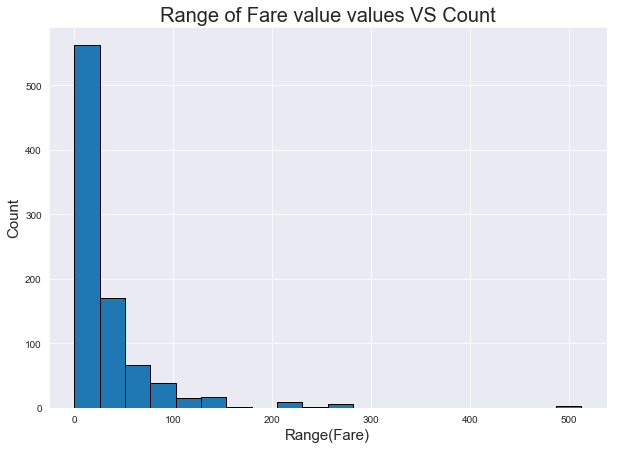

In [21]:
# BAR distributions of Survived and Pclass to look for std deviation
plt.figure(figsize = (10,7))
plt.hist(dataset['Fare'], bins = 20, histtype = 'bar', edgecolor = 'Black')
plt.title('Range of Fare value values VS Count', fontsize = 20)
plt.xlabel('Range(Fare)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

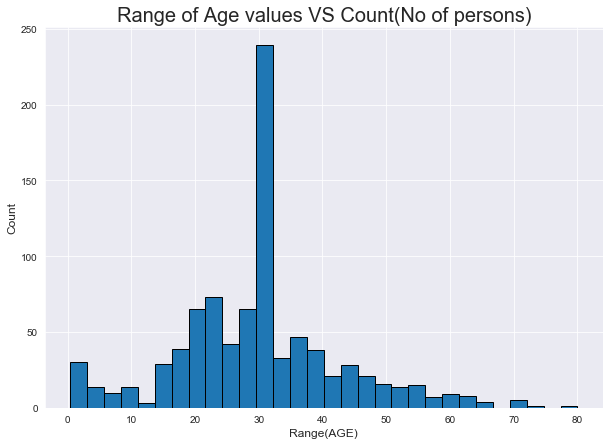

In [22]:
plt.figure(figsize = (10,7))
plt.hist(dataset['Age'], bins = 30, histtype = 'bar',edgecolor = 'Black')
plt.title('Range of Age values VS Count(No of persons)', fontsize = 20)
plt.xlabel('Range(AGE)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


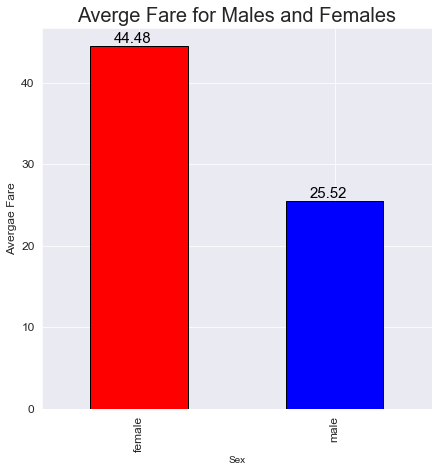

In [23]:
data_sur_fare = dataset.groupby('Sex').Fare.mean()
print(data_sur_fare)
ax_sur_fare = data_sur_fare.plot.bar(edgecolor = 'Black',fontsize = 12, figsize =(7,7), color = ['Red', 'Blue'])
plt.title('Averge Fare for Males and Females', fontsize = 20)
plt.ylabel('Avergae Fare', fontsize = 12)
for i in ax_sur_fare.patches:
    ax_sur_fare.text(i.get_x()+0.12, i.get_height() + 0.4, str(round(i.get_height(),2)) , fontsize = 15 , color = 'Black')

Text(0.5, 1.0, 'Survived VS SibSp')

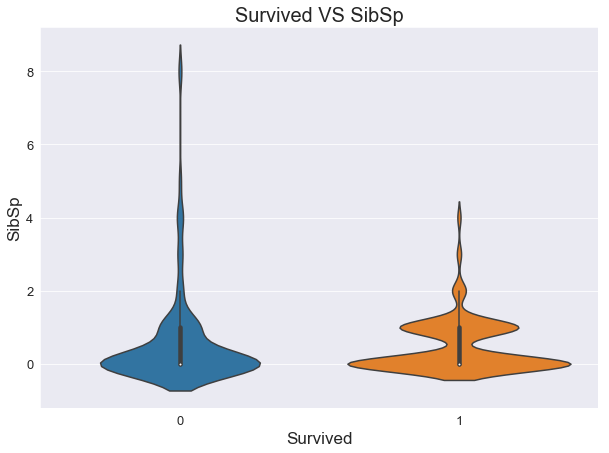

In [24]:
plt.figure(figsize = (10,7))
sns.violinplot(dataset['Survived'], dataset['SibSp'], )
plt.tick_params(labelsize = 13)
plt.xlabel('Survived', fontdict={'fontsize':17})
plt.ylabel('SibSp', fontdict = {'fontsize':17})
plt.title('Survived VS SibSp', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Average Age VS SibSp')

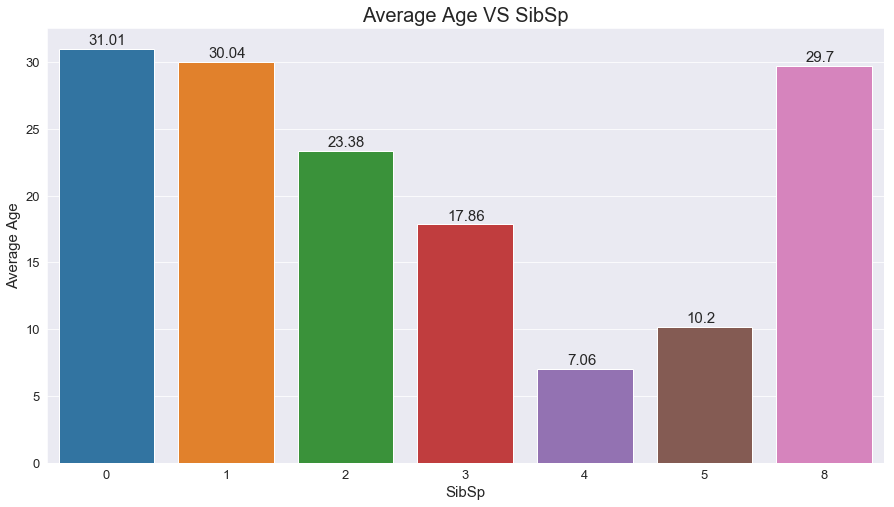

In [25]:
plt.figure(figsize = (15,8))
axes= sns.barplot(x = sorted(dataset['SibSp'].unique()), y = 'Age', data = dataset[['Age', 'SibSp']].groupby('SibSp').mean())
for ax in axes.patches:
    plt.text(ax.get_x() + 0.25, ax.get_height() + 0.3, str(round(ax.get_height(), 2)), fontsize = 15)
plt.xlabel('SibSp', fontdict = {'fontsize':15})
plt.ylabel('Average Age', fontdict = {'fontsize':15})
plt.tick_params(labelsize = 13)
plt.title('Average Age VS SibSp', fontdict = {'fontsize':20})

# MODEL PREPROCESSING

In [26]:
drop_cols = ['PassengerId','Name','Ticket','Cabin']

In [27]:
encode_cols = ['Sex','Embarked']

In [28]:
encode_after = pd.get_dummies(dataset[encode_cols])

In [29]:
encode_after.shape

(891, 5)

In [30]:
fin_data = dataset.copy()

In [31]:
fin_data = fin_data.drop(drop_cols, axis = 1)

In [32]:
fin_data = pd.concat([fin_data, encode_after], axis = 1)

In [33]:
fin_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [34]:
encode_cols_teset = pd.get_dummies(dataset_test[encode_cols])

In [35]:
fin_data_test = dataset_test.copy()

In [36]:
fin_data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
fin_data_test = fin_data_test.drop(['PassengerId','Name','Cabin', 'Embarked','Ticket','Sex'],axis =1)

In [38]:
fin_data_test = pd.concat([fin_data_test, encode_cols_teset], axis = 1)

In [39]:
fin_data_test = fin_data_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [40]:
fin_data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [41]:
fin_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [42]:
X_train = fin_data.values[:,1:]
Y_train = fin_data.values[:,0].reshape(891,1)

In [43]:
X_test = fin_data_test.values[:,:]
Y_test = gender.values[:,1:].reshape(418,1)

# MODEL IMPLEMENTATION

In [44]:
params = {'penalty':['l1','l2'], 'C':[0.01,0.1,1,10,100]}
lr = LogisticRegression(solver = 'liblinear')
grid = GridSearchCV(lr, param_grid=params, scoring ='f1', cv = 10, n_jobs=-1)
grid.fit(X_train, Y_train)

C:\Users\kjkr3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\kjkr3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [45]:
grid.best_params_

{'C': 10, 'penalty': 'l1'}

In [46]:
lr = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
lr.fit(X_train, Y_train)
predict = lr.predict(X_test)

C:\Users\kjkr3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print("Accuracy = {0}%".format(round(accuracy_score(Y_test, predict)*100, 2)))
print(classification_report(Y_test, predict))
print("Score = {0}".format(f1_score(Y_test, predict)))
print(confusion_matrix(Y_test, predict))

Accuracy = 94.5%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418

Score = 0.9250814332247558
[[253  13]
 [ 10 142]]


# NN MODEL

In [50]:
def model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu, kernel_initializer = 'normal'))
    model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [51]:
model = model()
model.fit(X_train, Y_train, epochs = 500)

W0825 19:50:21.484835  4164 deprecation.py:506] From C:\Users\kjkr3\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0825 19:50:21.487827  4164 deprecation.py:506] From C:\Users\kjkr3\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0825 19:50:21.682035  4164 deprecation.py:323] From C:\Users\kjkr3\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is de

Epoch 1/500
891/891 [==============================] - 1s 653us/sample - loss: 0.6194 - acc: 0.6756
Epoch 2/500
891/891 [==============================] - 0s 106us/sample - loss: 0.6020 - acc: 0.6734
Epoch 3/500
891/891 [==============================] - 0s 103us/sample - loss: 0.5915 - acc: 0.6857
Epoch 4/500
891/891 [==============================] - 0s 116us/sample - loss: 0.5653 - acc: 0.6936
Epoch 5/500
891/891 [==============================] - 0s 114us/sample - loss: 0.5536 - acc: 0.7015
Epoch 6/500
891/891 [==============================] - 0s 114us/sample - loss: 0.5259 - acc: 0.7407
Epoch 7/500
891/891 [==============================] - 0s 110us/sample - loss: 0.4832 - acc: 0.7969
Epoch 8/500
891/891 [==============================] - 0s 111us/sample - loss: 0.4797 - acc: 0.7834
Epoch 9/500
891/891 [==============================] - 0s 115us/sample - loss: 0.4677 - acc: 0.7890
Epoch 10/500
891/891 [==============================] - 0s 122us/sample - loss: 0.4632 - acc: 0.7946

891/891 [==============================] - 0s 107us/sample - loss: 0.3456 - acc: 0.8563
Epoch 83/500
891/891 [==============================] - 0s 99us/sample - loss: 0.3372 - acc: 0.8496
Epoch 84/500
891/891 [==============================] - 0s 100us/sample - loss: 0.3553 - acc: 0.8406
Epoch 85/500
891/891 [==============================] - 0s 100us/sample - loss: 0.3499 - acc: 0.8440
Epoch 86/500
891/891 [==============================] - 0s 97us/sample - loss: 0.3387 - acc: 0.8507
Epoch 87/500
891/891 [==============================] - 0s 97us/sample - loss: 0.3332 - acc: 0.8597
Epoch 88/500
891/891 [==============================] - 0s 99us/sample - loss: 0.3316 - acc: 0.8586
Epoch 89/500
891/891 [==============================] - 0s 102us/sample - loss: 0.3390 - acc: 0.8519
Epoch 90/500
891/891 [==============================] - 0s 103us/sample - loss: 0.3374 - acc: 0.8620
Epoch 91/500
891/891 [==============================] - 0s 95us/sample - loss: 0.3443 - acc: 0.8552
Epoch 92

891/891 [==============================] - 0s 96us/sample - loss: 0.2837 - acc: 0.8810
Epoch 163/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2769 - acc: 0.8844
Epoch 164/500
891/891 [==============================] - 0s 92us/sample - loss: 0.2789 - acc: 0.8889
Epoch 165/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2744 - acc: 0.8833
Epoch 166/500
891/891 [==============================] - 0s 95us/sample - loss: 0.2757 - acc: 0.8833
Epoch 167/500
891/891 [==============================] - 0s 94us/sample - loss: 0.3036 - acc: 0.8687
Epoch 168/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2863 - acc: 0.8799
Epoch 169/500
891/891 [==============================] - 0s 95us/sample - loss: 0.2812 - acc: 0.8799
Epoch 170/500
891/891 [==============================] - 0s 97us/sample - loss: 0.2668 - acc: 0.8822
Epoch 171/500
891/891 [==============================] - 0s 102us/sample - loss: 0.2689 - acc: 0.8844
Epo

Epoch 243/500
891/891 [==============================] - 0s 97us/sample - loss: 0.2385 - acc: 0.8923
Epoch 244/500
891/891 [==============================] - 0s 94us/sample - loss: 0.2663 - acc: 0.8889
Epoch 245/500
891/891 [==============================] - 0s 95us/sample - loss: 0.2604 - acc: 0.8956
Epoch 246/500
891/891 [==============================] - 0s 99us/sample - loss: 0.2618 - acc: 0.8934
Epoch 247/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2379 - acc: 0.8956
Epoch 248/500
891/891 [==============================] - 0s 95us/sample - loss: 0.2308 - acc: 0.9024
Epoch 249/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2387 - acc: 0.8934
Epoch 250/500
891/891 [==============================] - 0s 99us/sample - loss: 0.2470 - acc: 0.9012
Epoch 251/500
891/891 [==============================] - 0s 94us/sample - loss: 0.2564 - acc: 0.8844
Epoch 252/500
891/891 [==============================] - 0s 98us/sample - loss: 0.2358 - ac

891/891 [==============================] - 0s 101us/sample - loss: 0.2114 - acc: 0.9091
Epoch 324/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2323 - acc: 0.9024
Epoch 325/500
891/891 [==============================] - 0s 99us/sample - loss: 0.2236 - acc: 0.8967
Epoch 326/500
891/891 [==============================] - 0s 95us/sample - loss: 0.2377 - acc: 0.9001
Epoch 327/500
891/891 [==============================] - 0s 94us/sample - loss: 0.2207 - acc: 0.9102
Epoch 328/500
891/891 [==============================] - 0s 94us/sample - loss: 0.2184 - acc: 0.9136
Epoch 329/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2315 - acc: 0.8979
Epoch 330/500
891/891 [==============================] - 0s 99us/sample - loss: 0.2254 - acc: 0.9046
Epoch 331/500
891/891 [==============================] - 0s 102us/sample - loss: 0.2216 - acc: 0.9091
Epoch 332/500
891/891 [==============================] - 0s 100us/sample - loss: 0.2268 - acc: 0.9024
E

Epoch 404/500
891/891 [==============================] - 0s 104us/sample - loss: 0.1993 - acc: 0.9136
Epoch 405/500
891/891 [==============================] - 0s 96us/sample - loss: 0.2168 - acc: 0.9158
Epoch 406/500
891/891 [==============================] - 0s 96us/sample - loss: 0.1908 - acc: 0.9181
Epoch 407/500
891/891 [==============================] - 0s 95us/sample - loss: 0.1954 - acc: 0.9113
Epoch 408/500
891/891 [==============================] - 0s 94us/sample - loss: 0.1960 - acc: 0.9147
Epoch 409/500
891/891 [==============================] - 0s 100us/sample - loss: 0.1880 - acc: 0.9192
Epoch 410/500
891/891 [==============================] - 0s 96us/sample - loss: 0.1849 - acc: 0.9248
Epoch 411/500
891/891 [==============================] - 0s 97us/sample - loss: 0.1899 - acc: 0.9248
Epoch 412/500
891/891 [==============================] - 0s 95us/sample - loss: 0.2095 - acc: 0.9136
Epoch 413/500
891/891 [==============================] - 0s 97us/sample - loss: 0.2384 - 

891/891 [==============================] - 0s 100us/sample - loss: 0.1773 - acc: 0.9259
Epoch 485/500
891/891 [==============================] - 0s 100us/sample - loss: 0.1740 - acc: 0.9248
Epoch 486/500
891/891 [==============================] - 0s 102us/sample - loss: 0.1798 - acc: 0.9248
Epoch 487/500
891/891 [==============================] - 0s 100us/sample - loss: 0.1988 - acc: 0.9147
Epoch 488/500
891/891 [==============================] - 0s 98us/sample - loss: 0.2046 - acc: 0.9080
Epoch 489/500
891/891 [==============================] - 0s 96us/sample - loss: 0.1888 - acc: 0.9226
Epoch 490/500
891/891 [==============================] - 0s 98us/sample - loss: 0.1811 - acc: 0.9259
Epoch 491/500
891/891 [==============================] - 0s 97us/sample - loss: 0.1897 - acc: 0.9214
Epoch 492/500
891/891 [==============================] - 0s 98us/sample - loss: 0.1761 - acc: 0.9259
Epoch 493/500
891/891 [==============================] - 0s 93us/sample - loss: 0.1806 - acc: 0.9214


In [52]:
predict_nn = model.predict([X_test])

In [53]:
predict_nn_fin = []
for i in range(len(predict_nn)):
    if predict_nn[i]>=0.5:
        predict_nn_fin.append(1)
    else:
        predict_nn_fin.append(0)

In [54]:
print("Accuracy = {0}%".format(round(accuracy_score(Y_test, predict_nn_fin)*100, 2)))
print(classification_report(Y_test, predict_nn_fin))
print("Score = {0}".format(f1_score(Y_test, predict_nn_fin)))
print(confusion_matrix(Y_test, predict_nn_fin))

Accuracy = 81.1%
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       266
           1       0.74      0.75      0.74       152

    accuracy                           0.81       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.81      0.81       418

Score = 0.7426710097719871
[[225  41]
 [ 38 114]]
